autocorrelacion test

In [41]:
import quandl
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import json
import datetime as dt
from datetime import datetime
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [8]:
# Federal Debt: Total Public Debt as Percent of Gross Domestic Product, Quarterly
# Units: Percent of GDP, Seasonally Adjusted
# Source: FRED (Federal Reserve Bank St. Louis)

debt = quandl.get("FRED/GFDEGDQ188S", authtoken="ckJvd5G2a2dkK9nun3xS")

In [5]:
# S&P 500 Index Composite, Monthly
# Units: Index
# Source: Yale University, Online Data Robert Shiller

sp500 = quandl.get("YALE/SPCOMP", authtoken="ckJvd5G2a2dkK9nun3xS")

In [6]:
# Unemployment Rate, Monthly
# Units: Percent, Seasonally Adjusted
# Source: FRED (Federal Reserve Bank St. Louis)

u = quandl.get("FRED/M0892AUSM156SNBR", authtoken="ckJvd5G2a2dkK9nun3xS")

In [7]:
# Balance on Current Account, NIPA's, Quarterly
# Units: Billions of Dollars Seasonally Adjusted Annual Rate
# Source: FRED (Federal Reserve Bank St. Louis)

balance = quandl.get("FRED/NETFI", authtoken="ckJvd5G2a2dkK9nun3xS")

In [3]:
# US Presidents 

presidents = pd.read_csv('us_presidents.csv')

In [4]:
presidents = pd.DataFrame(presidents)

In [12]:
presidents.head(1)

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams


In [93]:
presidents['start'] = presidents['start'].astype('str')
print(presidents.info())
#dt.datetime.strptime(presidents['end'], '%B %d, %Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
Unnamed: 0    45 non-null int64
S.No.         45 non-null int64
start         45 non-null object
end           45 non-null object
president     45 non-null object
prior         45 non-null object
party         45 non-null object
vice          45 non-null object
dtypes: int64(2), object(6)
memory usage: 2.9+ KB
None


In [89]:
presidents

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
40,40,41,"January 20, 1989","January 20, 1993",George H. W. Bush,43rd Vice President of the United States,Republican,Dan Quayle
41,41,42,"January 20, 1993","January 20, 2001",Bill Clinton,40th & 42nd Governor of Arkansas (1979–1981...,Democratic,Al Gore
42,42,43,"January 20, 2001","January 20, 2009",George W. Bush,46th Governor of Texas ( 1995–2000 ),Republican,Dick Cheney
43,43,44,"January 20, 2009",nan,Barack Obama,U.S. Senator ( Class 3 ) from Illinois ...,Democratic,Joe Biden
44,44,45,"January 20, 2017",--,Donald Trump,Chairman of The Trump Organization ( 1971–...,Republican,Mike Pence


In [44]:
date = 'March 4, 1797'

In [48]:
date_2 = dt.datetime.strptime(date, '%B %d, %Y').strftime('%d-%m-%Y')

In [90]:
date_series = list(presidents['start'])

['April 30, 1789',
 'March 4, 1797',
 'March 4, 1801',
 'March 4, 1809',
 'March 4, 1817',
 'March 4, 1825',
 'March 4, 1829',
 'March 4, 1837',
 'March 4, 1841',
 'April 4, 1841',
 'March 4, 1845',
 'March 4, 1849',
 'July 9, 1850',
 'March 4, 1853',
 'March 4, 1857',
 'March 4, 1861',
 'April 15, 1865',
 'March 4, 1869',
 'March 4, 1877',
 'March 4, 1881',
 'September 19, 1881',
 'March 4, 1885',
 'March 4, 1889',
 'March 4, 1893',
 'March 4, 1897',
 'September 14, 1901',
 'March 4, 1909',
 'March 4, 1913',
 'March 4, 1921',
 'August 2, 1923',
 'March 4, 1929',
 'March 4, 1933',
 'April 12, 1945',
 'January 20, 1953',
 'January 20, 1961',
 'November 22, 1963',
 'January 20, 1969',
 'August 9, 1974',
 'January 20, 1977',
 'January 20, 1981',
 'January 20, 1989',
 'January 20, 1993',
 'January 20, 2001',
 'January 20, 2009',
 'January 20, 2017']

In [117]:

new_series = []
for row in date_series:
    date = dt.datetime.strptime(row,'%B %d, %Y').strftime('%d-%m-%Y')
    new_series.append(date)


In [118]:
new_series

['30-04-1789',
 '04-03-1797',
 '04-03-1801',
 '04-03-1809',
 '04-03-1817',
 '04-03-1825',
 '04-03-1829',
 '04-03-1837',
 '04-03-1841',
 '04-04-1841',
 '04-03-1845',
 '04-03-1849',
 '09-07-1850',
 '04-03-1853',
 '04-03-1857',
 '04-03-1861',
 '15-04-1865',
 '04-03-1869',
 '04-03-1877',
 '04-03-1881',
 '19-09-1881',
 '04-03-1885',
 '04-03-1889',
 '04-03-1893',
 '04-03-1897',
 '14-09-1901',
 '04-03-1909',
 '04-03-1913',
 '04-03-1921',
 '02-08-1923',
 '04-03-1929',
 '04-03-1933',
 '12-04-1945',
 '20-01-1953',
 '20-01-1961',
 '22-11-1963',
 '20-01-1969',
 '09-08-1974',
 '20-01-1977',
 '20-01-1981',
 '20-01-1989',
 '20-01-1993',
 '20-01-2001',
 '20-01-2009',
 '20-01-2017']

In [112]:
date_format(date_series)

In [8]:
sp = sp500.iloc[:,:1]

In [9]:
# Get the date in a new column to be able to merge tables on Date
sp['Date'] = sp.index

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# Adding a new column with t-1 (lag) values to calculate monthly returns on S&P
sp['lag'] = sp['S&P Composite'].shift(1)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# As there is no lagged S&P for the first date we delete the first row 

to_drop = sp.iloc[:1]
sp.drop(to_drop.index, axis=0, inplace=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
# The S&P monthly returns is simply the rate of change between months ((t - t-1)/t-1)*100

sp['monthly_return_per'] = ((sp['S&P Composite']-sp['lag'])/sp['lag'])*100

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
sp.head()

,S&P Composite,Date,lag,monthly_return_per
Year,,,,
1871-02-28,4.50,1871-02-28,4.44,1.351351
1871-03-31,4.61,1871-03-31,4.50,2.444444
1871-04-30,4.74,1871-04-30,4.61,2.819957
1871-05-31,4.86,1871-05-31,4.74,2.531646
1871-06-30,4.82,1871-06-30,4.86,-0.823045


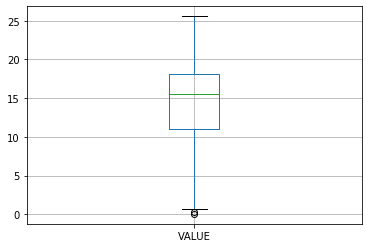

In [181]:
u.boxplot()

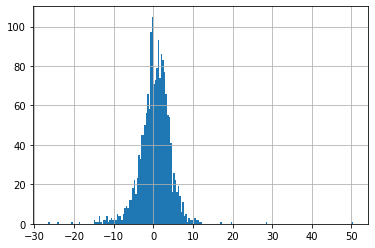

In [183]:
sp['monthly_return_per'].hist(bins=200)

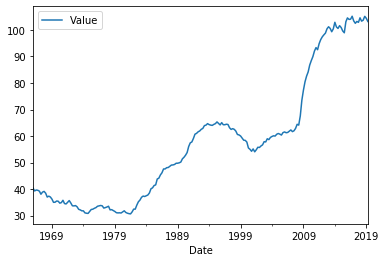

In [9]:
debt.plot()

In [23]:
balance['lag'] = balance['Value'].shift(1)

In [6]:
formula_sp = 'c + c(president) + e'